In [2]:
# import required libraries
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ggplot2)
library(grid)
library(gridExtra)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

# An Investigation into How Personality Characteristics Affect Self Reported Feelings of Depression

## Introduction

Taylor Manifest Anxiety Scale (TMAS), made for adults, originally determined anxiety levels by using 50 true-or-false reflective questions that touch on various factors that contribute to anxiety; 42 questions from the Depression, Anxiety, Stress Scale (DASS) version are used in the referenced dataset and responses are on a scale of 1 (did not apply) to 4 (applied very much). Participants’ responses were stored in variable A (eg: Q13A), response time in E, and questions’ positions in the survey in I. Answers to other demographic questions and a built-in validity check (checking if participants know definitions by determining which 3 words were fake) were also included in the data. The dataset, “Predicting Depression, Anxiety, and Stress”, was removed from Kaggle and therefore can only be found in our GitHub folder: https://raw.githubusercontent.com/FionaC124/group-one-project/main/dass_data.csv?token=GHSAT0AAAAAABQGS3PIQOXUVU4V7TBTZOPGYREEL7A.

In this project, we will attempt to use the Ten Item Personality Inventory (TIPI) values, in addition to participants’ education level and age, to predict the average score of all 42 DASS questions. TIPI is based on the Big 5 personality domains, which include extraversion, agreeableness, openness, conscientiousness, and neuroticism. TIPI evaluates participants on these dimensions; values were self-reported on a scale of 1 (strongly disagree) to 7 (strongly agree) as part of the survey. We choose to use TIPI values as predictors in our model because depression, anxiety, and stress could be linked to traits described by the Big 5 personality domains. For example, depression may be positively related to neuroticism but negatively related to extraversion. Further, we wish to see whether there is a difference in degrees of depression, anxiety, and stress between generations and education levels. Therefore, the very large raw dataset will be cleaned by removing observations of participants who did not pass the validity check or spent too long/too short of a time doing the survey and then selecting for only variables related to our specific goal. 

## Methods & Results

### Data Wrangling

The data set is in csv format and can be read in using the read_csv function. We will assign the raw data to the label dass_data.

In [3]:
# Reading in the data
url <- "https://raw.githubusercontent.com/FionaC124/group-one-project/main/dass_data.csv?token=GHSAT0AAAAAABQGS3PIQOXUVU4V7TBTZOPGYREEL7A"
dass_data <- read_csv(url)

Parsed with column specification:
cols(
  .default = col_double(),
  country = col_character(),
  major = col_character()
)

See spec(...) for full column specifications.



To ensure that the data was read in correctly, we will use the nrow(), names(), and head() functions to preview the number of observations, column headers, and first six rows.

In [4]:
#Number of rows in the data
nrow(dass_data)

#Column names in the raw data
names(dass_data)

#Preview the data
head(dass_data)

[1] 39775

[1] "Q1A"                   "Q1I"                   "Q1E"                  
  [4] "Q2A"                   "Q2I"                   "Q2E"                  
  [7] "Q3A"                   "Q3I"                   "Q3E"                  
 [10] "Q4A"                   "Q4I"                   "Q4E"                  
 [13] "Q5A"                   "Q5I"                   "Q5E"                  
 [16] "Q6A"                   "Q6I"                   "Q6E"                  
 [19] "Q7A"                   "Q7I"                   "Q7E"                  
 [22] "Q8A"                   "Q8I"                   "Q8E"                  
 [25] "Q9A"                   "Q9I"                   "Q9E"                  
 [28] "Q10A"                  "Q10I"                  "Q10E"                 
 [31] "Q11A"                  "Q11I"                  "Q11E"                 
 [34] "Q12A"                  "Q12I"                  "Q12E"                 
 [37] "Q13A"                  "Q13I"                  "Q13E"                 
 [40] "Q14A"                  "Q14I"                  "Q14E"                 
 [43] "Q15A"                  "Q15I"                  "Q15E"                 
 [46] "Q16A"                  "Q16I"                  "Q16E"                 
 [49] "Q17A"                  "Q17I"                  "Q17E"                 
 [52] "Q18A"                  "Q18I"                  "Q18E"                 
 [55] "Q19A"                  "Q19I"                  "Q19E"                 
 [58] "Q20A"                  "Q20I"                  "Q20E"                 
 [61] "Q21A"                  "Q21I"                  "Q21E"                 
 [64] "Q22A"                  "Q22I"                  "Q22E"                 
 [67] "Q23A"                  "Q23I"                  "Q23E"                 
 [70] "Q24A"                  "Q24I"                  "Q24E"                 
 [73] "Q25A"                  "Q25I"                  "Q25E"                 
 [76] "Q26A"                  "Q26I"                  "Q26E"                 
 [79] "Q27A"                  "Q27I"                  "Q27E"                 
 [82] "Q28A"                  "Q28I"                  "Q28E"                 
 [85] "Q29A"                  "Q29I"                  "Q29E"                 
 [88] "Q30A"                  "Q30I"                  "Q30E"                 
 [91] "Q31A"                  "Q31I"                  "Q31E"                 
 [94] "Q32A"                  "Q32I"                  "Q32E"                 
 [97] "Q33A"                  "Q33I"                  "Q33E"                 
[100] "Q34A"                  "Q34I"                  "Q34E"                 
[103] "Q35A"                  "Q35I"                  "Q35E"                 
[106] "Q36A"                  "Q36I"                  "Q36E"                 
[109] "Q37A"                  "Q37I"                  "Q37E"                 
[112] "Q38A"                  "Q38I"                  "Q38E"                 
[115] "Q39A"                  "Q39I"                  "Q39E"                 
[118] "Q40A"                  "Q40I"                  "Q40E"                 
[121] "Q41A"                  "Q41I"                  "Q41E"                 
[124] "Q42A"                  "Q42I"                  "Q42E"                 
[127] "country"               "source"                "introelapse"          
[130] "testelapse"            "surveyelapse"          "TIPI1"                
[133] "TIPI2"                 "TIPI3"                 "TIPI4"                
[136] "TIPI5"                 "TIPI6"                 "TIPI7"                
[139] "TIPI8"                 "TIPI9"                 "TIPI10"               
[142] "VCL1"                  "VCL2"                  "VCL3"                 
[145] "VCL4"                  "VCL5"                  "VCL6"                 
[148] "VCL7"                  "VCL8"                  "VCL9"                 
[151] "VCL10"                 "VCL11"                 "VCL12"                
[154] "VCL13"           

Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,⋯,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
4,28,3890,4,25,2122,2,16,1944,4,⋯,1,1,1,12,1,10,2,1,2,NA
4,2,8118,1,36,2890,2,35,4777,3,⋯,2,1,2,7,0,70,2,1,4,NA
3,7,5784,1,33,4373,4,41,3242,1,⋯,2,1,1,4,3,60,1,1,3,NA
2,23,5081,3,11,6837,2,37,5521,1,⋯,2,1,2,4,5,70,2,1,5,biology
2,36,3215,2,13,7731,3,5,4156,4,⋯,2,2,3,10,1,10,2,1,4,Psychology
1,18,6116,1,28,3193,2,2,12542,1,⋯,2,1,1,4,1,70,2,1,4,NA


**Table 1**: First six rows of the DASS survey data.

### Data Cleaning

In the DASS survey, participants were presented with a check-list of words and were given the instruction "In the grid below, check all the words whose definitions you are sure you know". Three words, "cuivocal", "florted", and "verdid" were not real words and were intended to be used as a validity check. As such, we will exclude participants from the data, who selected these words coded by VCL6, VCL9, and VCL12 using the filter() function. Filtering out these participants reduces the data set by 5,192 observations, leaving 34583.

In [5]:
# Data Cleaning with VCL (VCL6, VCL9, and VCL12 are not real words)
dass_valid <- dass_data %>% filter((VCL6 == 0) & (VCL9 == 0) & (VCL12 == 0))
dass_valid$VCL6

# Number of rows in data to show how many rows remaining after VCL6, VCL9, and VCL12 were removed
nrow(dass_valid)

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   [37] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   [73] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [109] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [145] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [181] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [217] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [253] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [289] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [325] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [361] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [397] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [433] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [469] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [505] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [541] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [577] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [613] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [649] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [685] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [721] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [757] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [793] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [829] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [865] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [901] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [937] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [973] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1009] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1045] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1081] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1117] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1153] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1189] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1225] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1261] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1333] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1369] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1405] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1441] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1477] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1513] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1549] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1585] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1621] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1657] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1693] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1729] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1765] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [18

[1] 34583

As well, data from participants who took too long or too short to answer the survey will also be removed, as this suggests that the participants either answered randomly if they took too short of a time or were more likely to overthink their answer if they took too long. **add the reference from here https://www.degruyter.com/document/doi/10.1515/edu-2019-0004/html**

In [6]:
# Removing surveys that took too long or too short
test_time <- quantile(dass_valid$testelapse, probs = seq(0.05, 1, 0.05))
survey_time <- quantile(dass_valid$surveyelapse, probs = seq(0.05, 1, 0.05))
test_time
survey_time

5%        10%        15%        20%        25%        30%        35% 
     119.0      135.0      147.0      158.0      168.0      177.0      187.0 
       40%        45%        50%        55%        60%        65%        70% 
     196.0      206.0      217.0      229.0      242.0      257.0      276.0 
       75%        80%        85%        90%        95%       100% 
     300.0      332.0      380.0      470.0      702.9 20829721.0

5%      10%      15%      20%      25%      30%      35%      40% 
     100      117      129      139      147      155      163      171 
     45%      50%      55%      60%      65%      70%      75%      80% 
     179      188      197      207      219      232      250      272 
     85%      90%      95%     100% 
     305      363      508 20828454

In [7]:
# Filtering out the lower and top 5% of the data for response time
dass_valid <- dass_valid %>% filter((testelapse > test_time["5%"])&(testelapse < test_time["95%"])&
                                    (surveyelapse > survey_time["5%"])&(surveyelapse < survey_time["95%"]))

# Number of rows in data to show how many rows remaining
nrow(dass_valid)

[1] 28433

After removing responses that ranked in the top 5% and bottom 5% for test and survey time, we further remove another 6,150 participants, leaving us with 28433 observations. 

We then select only the responses to each question in the DASS survey, along with each TIPI, education, and age. **These are selected because**

In [8]:
# Removed meta irrelevant data columns, leaving only the QA questions, TIPIs, education, and age
dass_selected <- dass_valid %>%
    select(ends_with("A") | starts_with("TIPI"), education, age)
names(dass_selected)


[1] "Q1A"       "Q2A"       "Q3A"       "Q4A"       "Q5A"       "Q6A"      
 [7] "Q7A"       "Q8A"       "Q9A"       "Q10A"      "Q11A"      "Q12A"     
[13] "Q13A"      "Q14A"      "Q15A"      "Q16A"      "Q17A"      "Q18A"     
[19] "Q19A"      "Q20A"      "Q21A"      "Q22A"      "Q23A"      "Q24A"     
[25] "Q25A"      "Q26A"      "Q27A"      "Q28A"      "Q29A"      "Q30A"     
[31] "Q31A"      "Q32A"      "Q33A"      "Q34A"      "Q35A"      "Q36A"     
[37] "Q37A"      "Q38A"      "Q39A"      "Q40A"      "Q41A"      "Q42A"     
[43] "TIPI1"     "TIPI2"     "TIPI3"     "TIPI4"     "TIPI5"     "TIPI6"    
[49] "TIPI7"     "TIPI8"     "TIPI9"     "TIPI10"    "education" "age"

To visualize how each question in the DASS survey correlates to each of the other questions, ggcorr() can be run on the questions themselves.

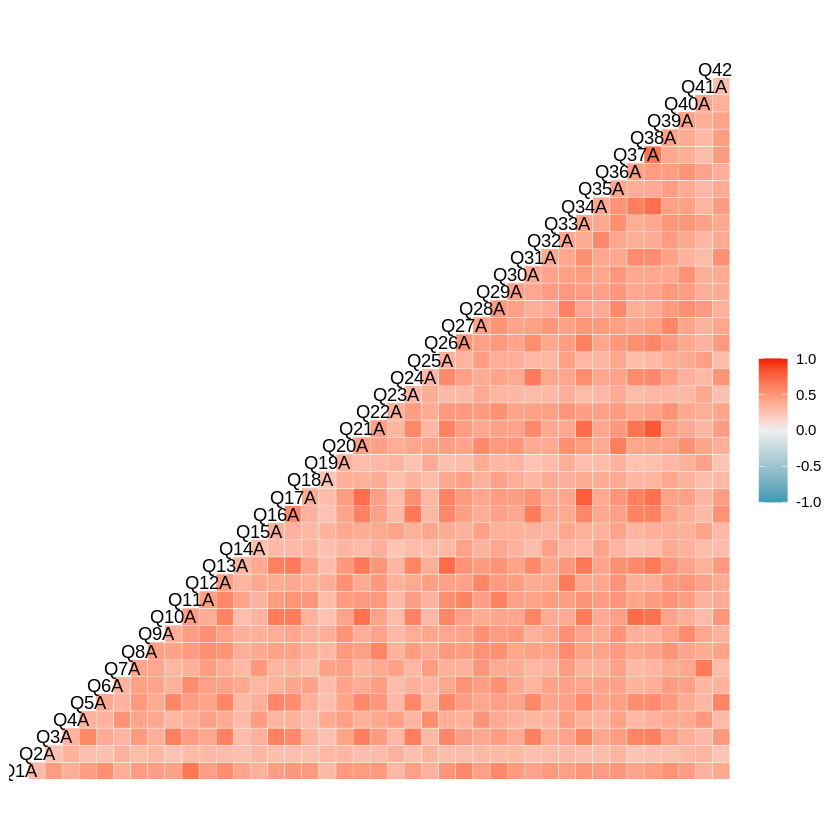

In [9]:
dass_selected_qs <- dass_selected %>%
    select(ends_with("A"))
ggcorr(dass_selected_qs)

From this figure, it is apparent that all questions have some degree of positive correlation with each other. This is due to the each question being representative of a symptom of depression, anxiety, or stress, and all questions prompt the "positive" reponse on the scale of 1 to 4. In other words, all questions are phrased such that the participant is always prompted to respond with a higher number the more they experience depression, anxiety, or stress. Because of this, we will create our target variable as the mean of the responses to all 42 questions for each participant. We achieve this by combining the mutate() and rowMeans() functions to create another column that encompasses the mean of responses to all questions.

In [10]:
# Creating our target variable (average of all Q responses), dropping the Q responses

dass_clean <- dass_selected %>% mutate(avg = rowMeans(select(dass_selected, starts_with("Q")))) %>% select(!starts_with("Q")) %>% filter(TIPI1 > 0 
                            & TIPI2 > 0 & TIPI3 > 0 & TIPI4 > 0 & TIPI5 > 0 & TIPI6 > 0 & TIPI7 > 0 & TIPI8 > 0 & TIPI9 > 0  & TIPI10 > 0 & age < 90)
names(dass_clean)

# Now we only have 28433 rows and 12 predictors and avg of Q responses as our target variable

[1] "TIPI1"     "TIPI2"     "TIPI3"     "TIPI4"     "TIPI5"     "TIPI6"    
 [7] "TIPI7"     "TIPI8"     "TIPI9"     "TIPI10"    "education" "age"      
[13] "avg"

In [11]:
head(dass_clean)

TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,age,avg
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5,7,7,7,7,7,5,1,1,2,16,3.404762
6,5,4,7,5,4,7,7,1,5,2,16,2.619048
2,5,2,2,5,6,5,5,3,2,2,17,2.619048
1,1,7,4,6,4,6,1,6,1,1,13,2.166667
2,5,3,6,5,5,5,6,3,3,3,19,3.404762
2,1,6,1,7,7,7,2,6,7,2,20,1.738095


## Exploratory Data Analysis

We can see preliminary statistics of each predictor using by calling the summary() function on our cleaned data.

In [12]:
summary(dass_clean)

     TIPI1           TIPI2           TIPI3           TIPI4      
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:2.000   1st Qu.:3.000   1st Qu.:4.000   1st Qu.:5.000  
 Median :4.000   Median :5.000   Median :5.000   Median :6.000  
 Mean   :3.874   Mean   :4.253   Mean   :4.827   Mean   :5.234  
 3rd Qu.:5.000   3rd Qu.:6.000   3rd Qu.:6.000   3rd Qu.:7.000  
 Max.   :7.000   Max.   :7.000   Max.   :7.000   Max.   :7.000  
     TIPI5           TIPI6           TIPI7           TIPI8          TIPI9      
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.00   Min.   :1.000  
 1st Qu.:4.000   1st Qu.:4.000   1st Qu.:5.000   1st Qu.:3.00   1st Qu.:2.000  
 Median :5.000   Median :5.000   Median :6.000   Median :5.00   Median :4.000  
 Mean   :4.987   Mean   :4.912   Mean   :5.388   Mean   :4.36   Mean   :3.716  
 3rd Qu.:6.000   3rd Qu.:6.000   3rd Qu.:7.000   3rd Qu.:6.00   3rd Qu.:5.000  
 Max.   :7.000   Max.   :7.000   Max.   :7.000   Max.   :7.00   M

Using histograms, we can take a look at the distributions of all our predictor variables. 

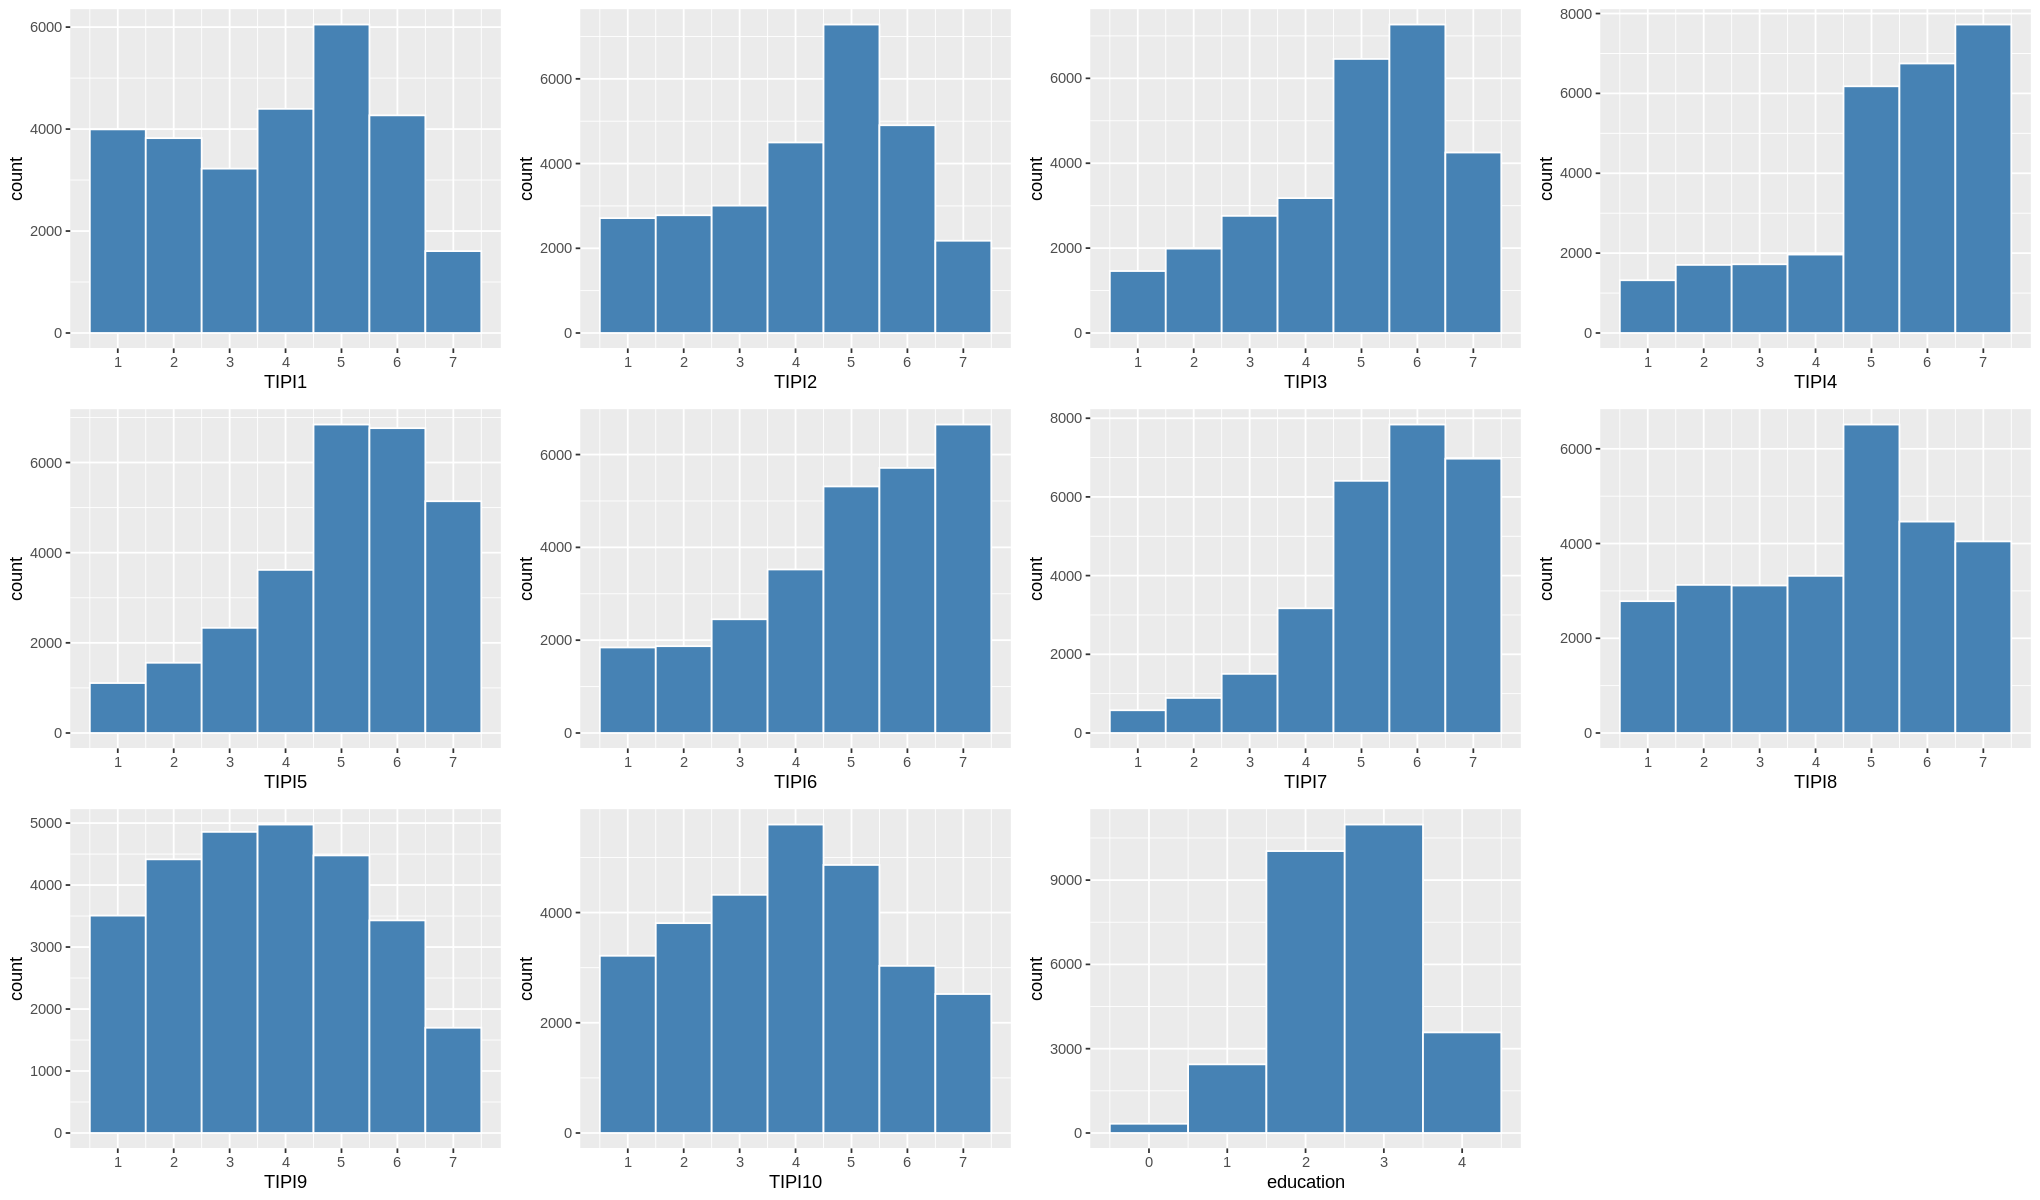

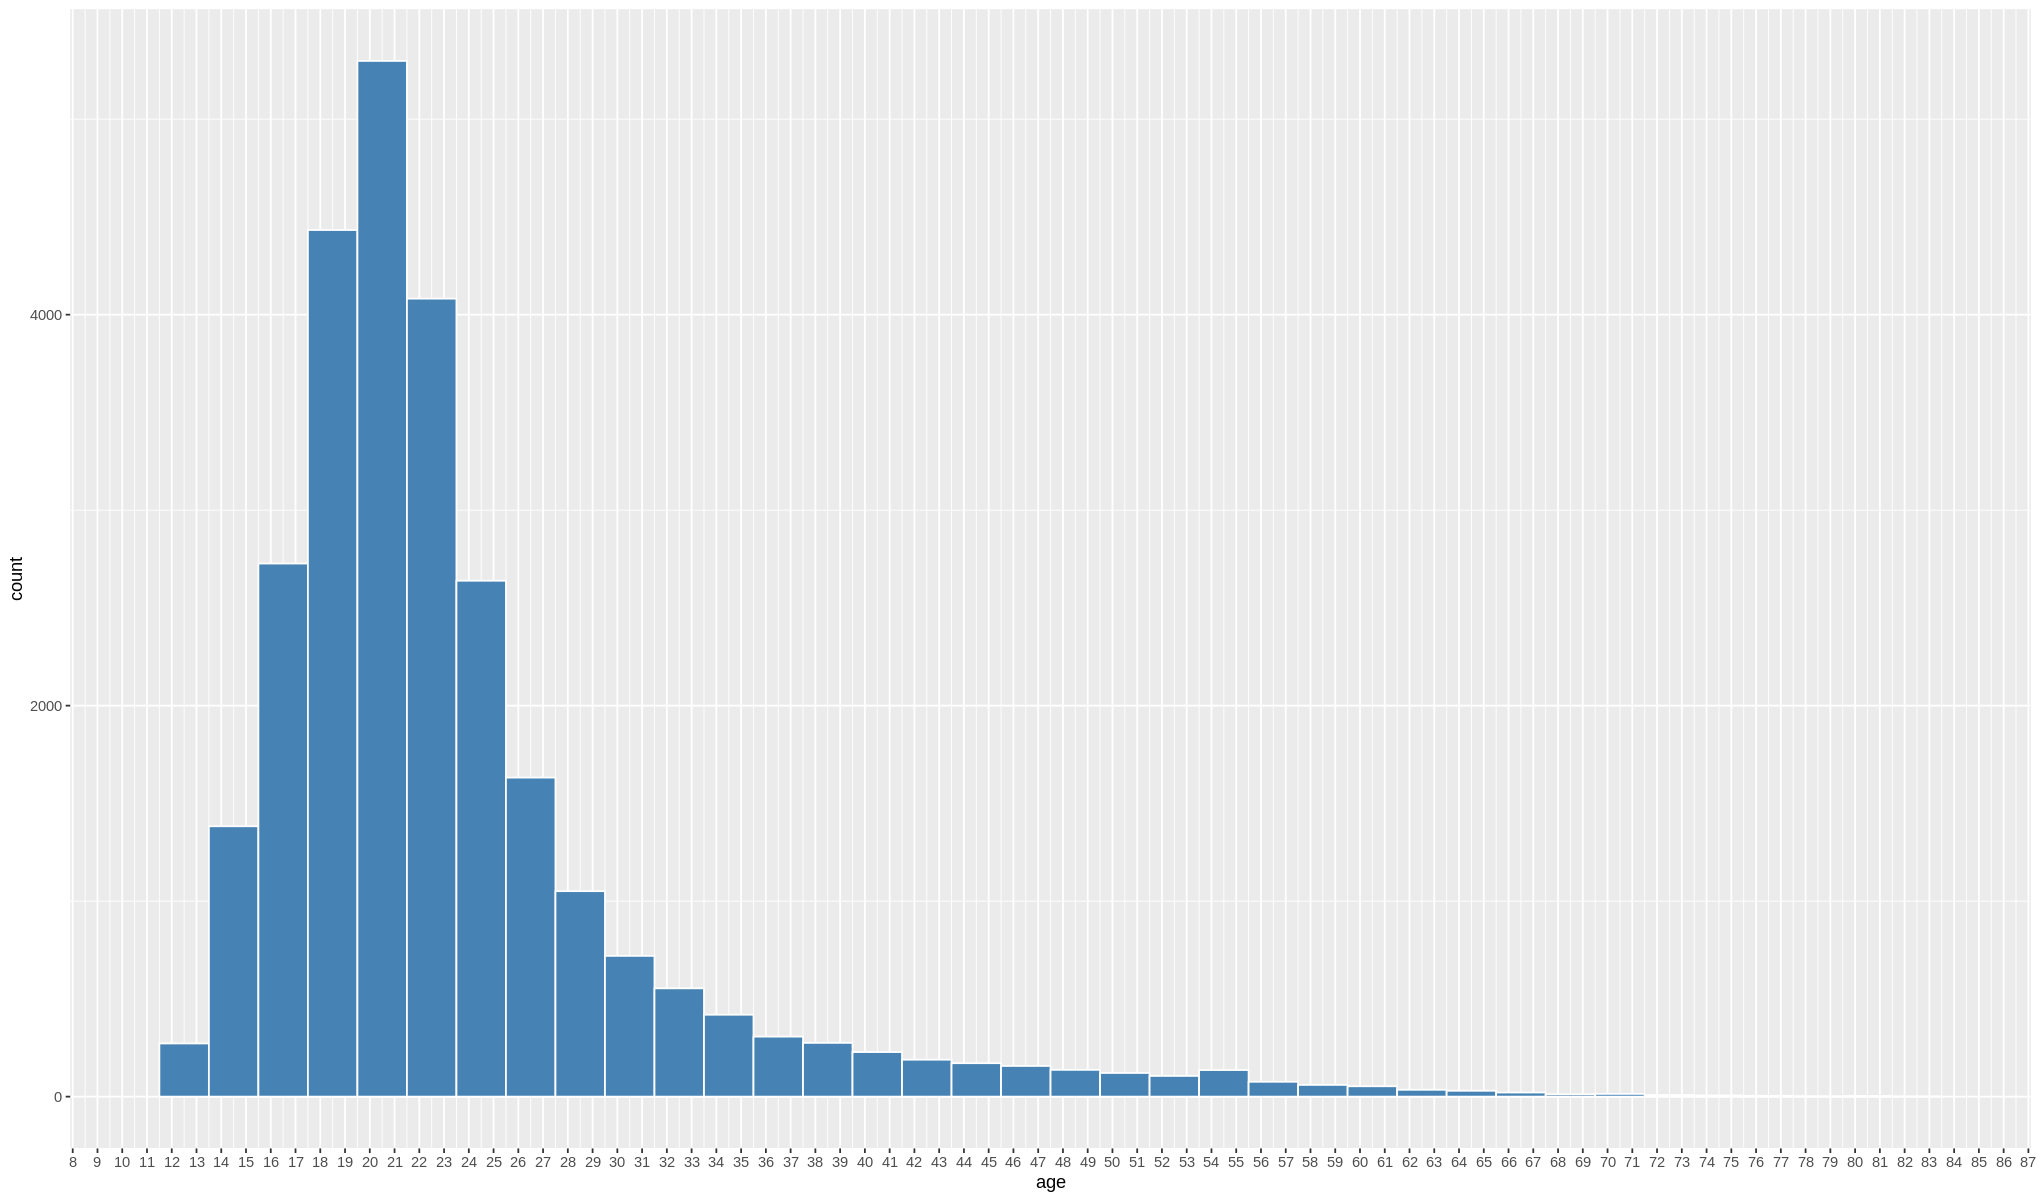

In [13]:
TIPI1_hist <- ggplot(dass_clean,aes(TIPI1)) + 
                    geom_histogram(binwidth=1,boundary=-0.5, col = "white", fill = "steelblue") + 
                    scale_x_continuous(breaks=0:7)
TIPI2_hist <- ggplot(dass_clean,aes(TIPI2)) + 
                    geom_histogram(binwidth=1,boundary=-0.5, col = "white", fill = "steelblue") + 
                    scale_x_continuous(breaks=0:7)
TIPI3_hist <- ggplot(dass_clean,aes(TIPI3)) + 
                    geom_histogram(binwidth=1,boundary=-0.5, col = "white", fill = "steelblue") + 
                    scale_x_continuous(breaks=0:7)
TIPI4_hist <- ggplot(dass_clean,aes(TIPI4)) + 
                    geom_histogram(binwidth=1,boundary=-0.5, col = "white", fill = "steelblue") + 
                    scale_x_continuous(breaks=0:7)
TIPI5_hist <- ggplot(dass_clean,aes(TIPI5)) + 
                    geom_histogram(binwidth=1,boundary=-0.5, col = "white", fill = "steelblue") + 
                    scale_x_continuous(breaks=0:7)
TIPI6_hist <- ggplot(dass_clean,aes(TIPI6)) + 
                    geom_histogram(binwidth=1,boundary=-0.5, col = "white", fill = "steelblue") + 
                    scale_x_continuous(breaks=0:7)
TIPI7_hist <- ggplot(dass_clean,aes(TIPI7)) + 
                    geom_histogram(binwidth=1,boundary=-0.5, col = "white", fill = "steelblue") + 
                    scale_x_continuous(breaks=0:7)

TIPI8_hist <- ggplot(dass_clean,aes(TIPI8)) + 
                    geom_histogram(binwidth=1,boundary=-0.5, col = "white", fill = "steelblue") + 
                    scale_x_continuous(breaks=0:7)

TIPI9_hist <- ggplot(dass_clean,aes(TIPI9)) + 
                    geom_histogram(binwidth=1,boundary=-0.5, col = "white", fill = "steelblue") + 
                    scale_x_continuous(breaks=0:7)

TIPI10_hist <- ggplot(dass_clean,aes(TIPI10)) + 
                    geom_histogram(binwidth=1,boundary=-0.5, col = "white", fill = "steelblue") + 
                    scale_x_continuous(breaks=0:7)

education_hist <- ggplot(dass_clean,aes(education)) + 
                    geom_histogram(binwidth=1,boundary=-0.5, col = "white", fill = "steelblue") + 
                    scale_x_continuous(breaks=0:7)

age_hist <- ggplot(dass_clean,aes(age)) + 
                    geom_histogram(binwidth=2,boundary=-0.5, col = "white", fill = "steelblue") + 
                    scale_x_continuous(breaks=0:100)

options(repr.plot.width=17, repr.plot.height=10)

grid.arrange(TIPI1_hist, TIPI2_hist, TIPI3_hist, TIPI4_hist, TIPI5_hist, 
             TIPI6_hist, TIPI7_hist, TIPI8_hist, TIPI9_hist, TIPI10_hist, 
             education_hist, nrow = 3)

age_hist

From above, we can see that the age demographic is skewed to the right with the peak occuring around 20 years old. This suggests that the results from the data are more representative of the younger generation; the model would be most likely be able to more accurately predict avgQ score for younger participants compared to older ones.

We can then create a heat map to visually see how each predictor is correlated with the response target variable. From the figure below, it is evident that two predictors stand out. TIPI4 shows a strong positive correlation to the avgQ score, indicated by the dark red. Since TIPI4 is "Anxious, easily upset", the strong positive correlation is expected. TIPI9, on the other hand, shows a strong negative correlation to the avgQ score, indicated by the dark blue. TIPI9 is "Calm, emotionally stable" which is, again, expected to have a negative correlation with feelings of depression, anxiety, and stress. 

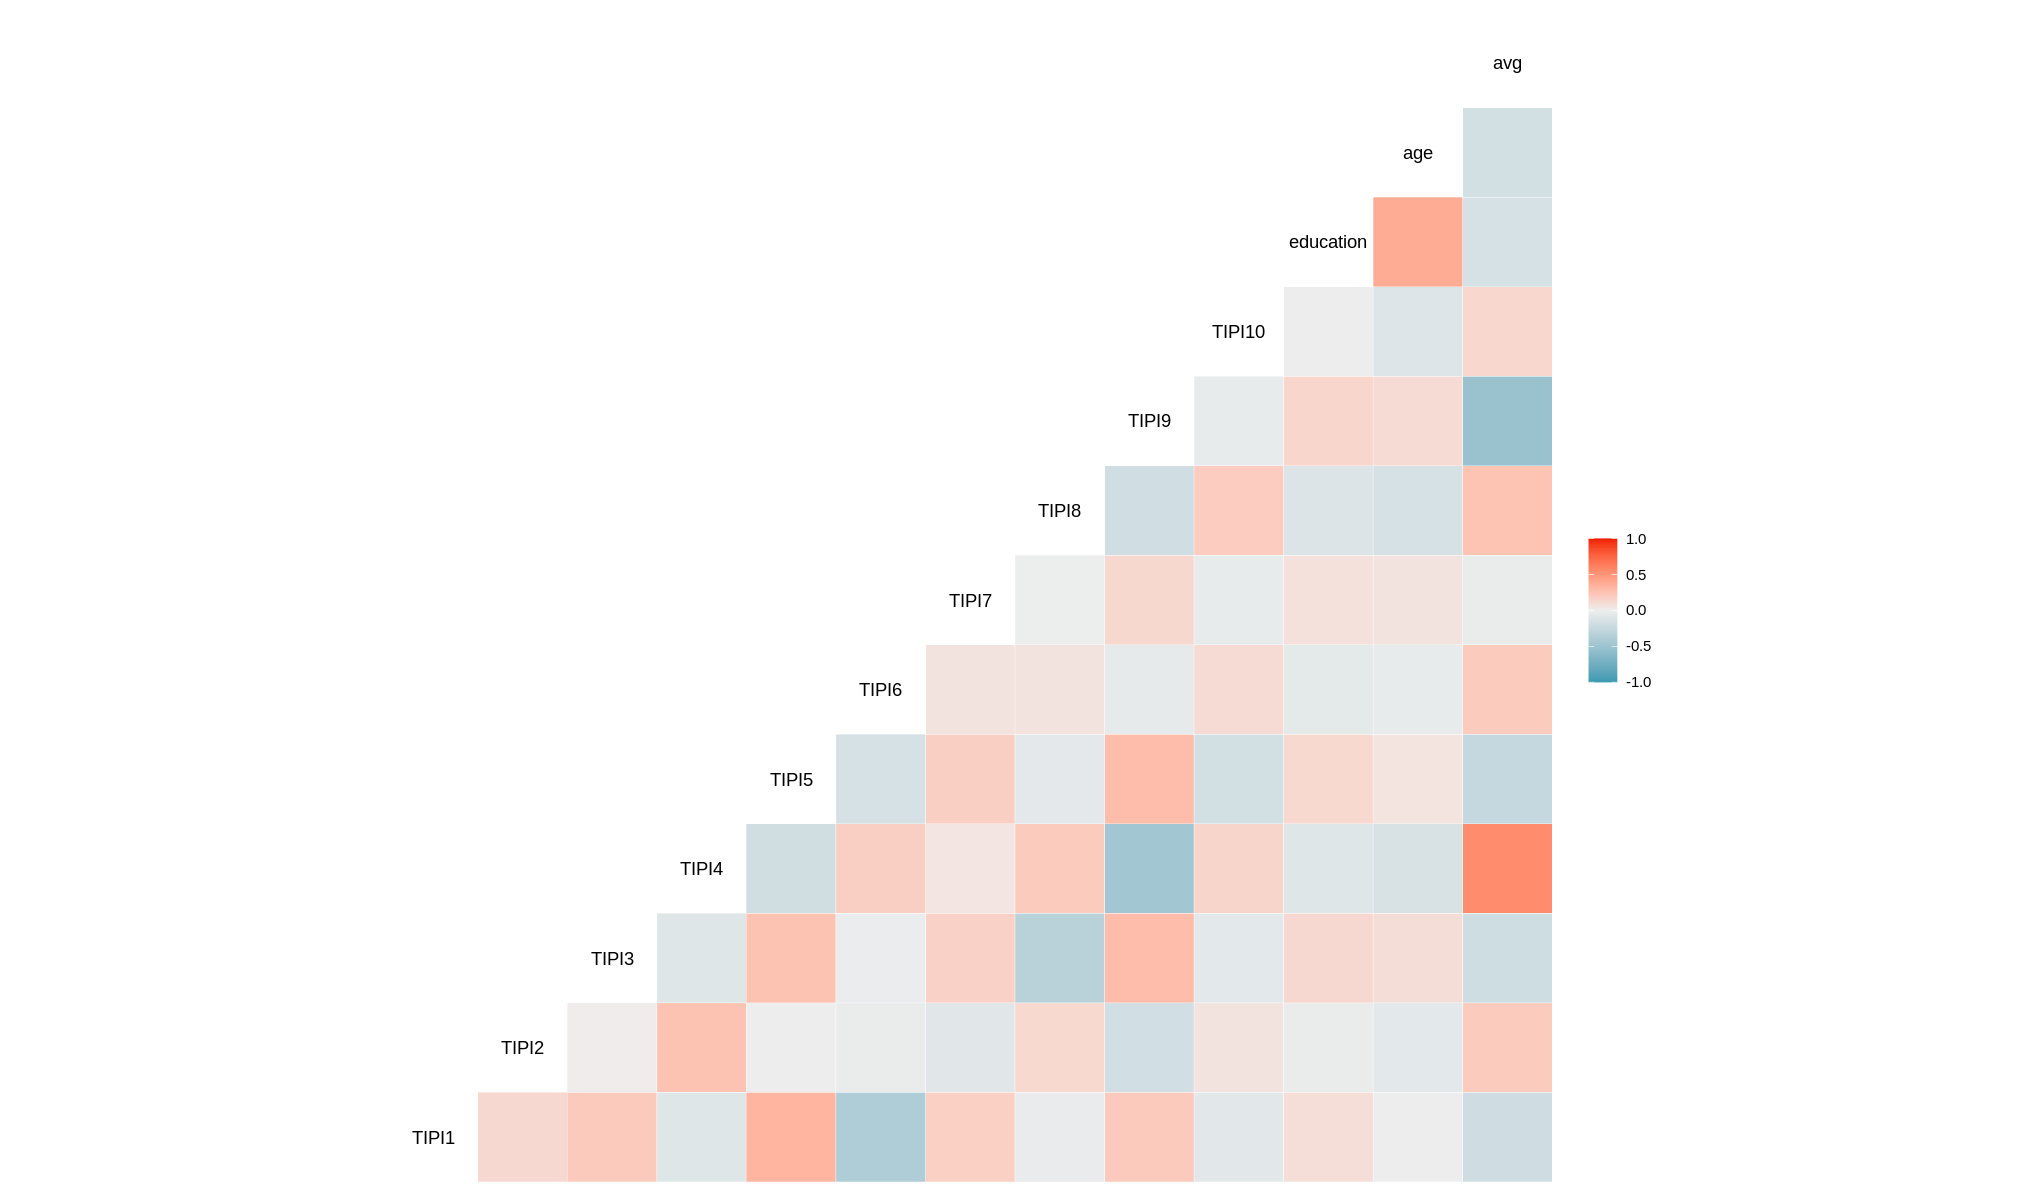

In [14]:
ggcorr(dass_clean)

The histogram below shows the distribution of the avgQ score among all participants. We can observe that the distribution exhibits that of a bell curve with a peak that is centred at around 2.5. 

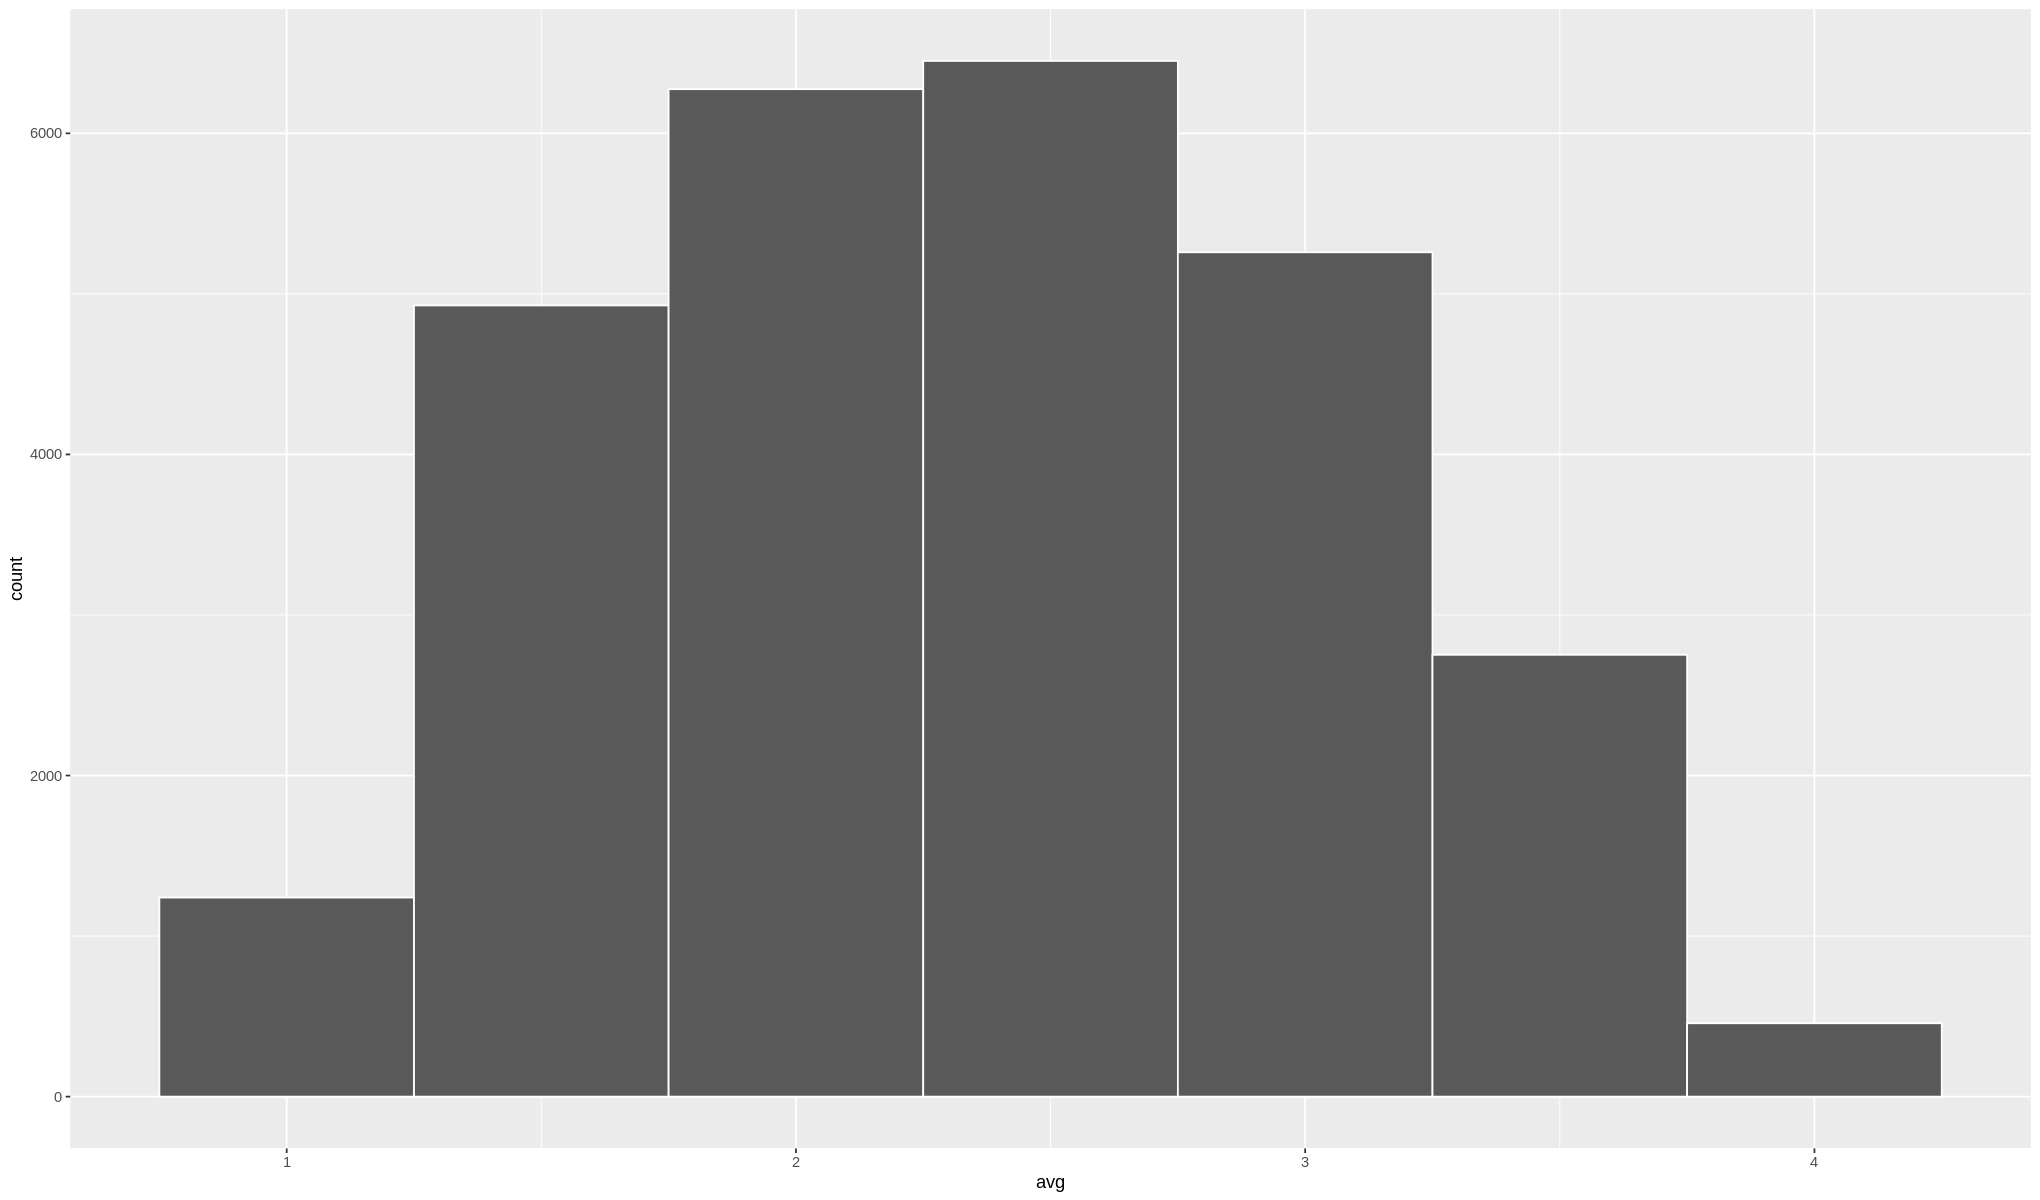

In [15]:
ggplot(dass_clean, aes(x=avg)) + geom_histogram(binwidth=0.5, col = "white")

To get a visualization of what each predictor's trend in relation to the avgQ target is like, the data frame can be pivoted and summarized.

In [16]:
dass_pivot <- pivot_longer(dass_clean, cols = TIPI1:age, names_to = "Predictor", values_to = "Predictor_Value")

summary_table <- dass_pivot %>% 
    group_by(Predictor, Predictor_Value) %>% 
    summarize(mean = mean(avg), sd = sd(avg), n = n())


head(summary_table)

`summarise()` regrouping output by 'Predictor' (override with `.groups` argument)



Predictor,Predictor_Value,mean,sd,n
<chr>,<dbl>,<dbl>,<dbl>,<int>
age,13,2.698529,0.6662757,272
age,14,2.732996,0.6384821,523
age,15,2.611351,0.6813218,860
age,16,2.556472,0.6599727,1307
age,17,2.523742,0.6705809,1420
age,18,2.448886,0.6841197,2003


Using this pivoted dataframe, we can plot each predictor variable (each TIPI, education level, age) against the mean avgQ for each participant.

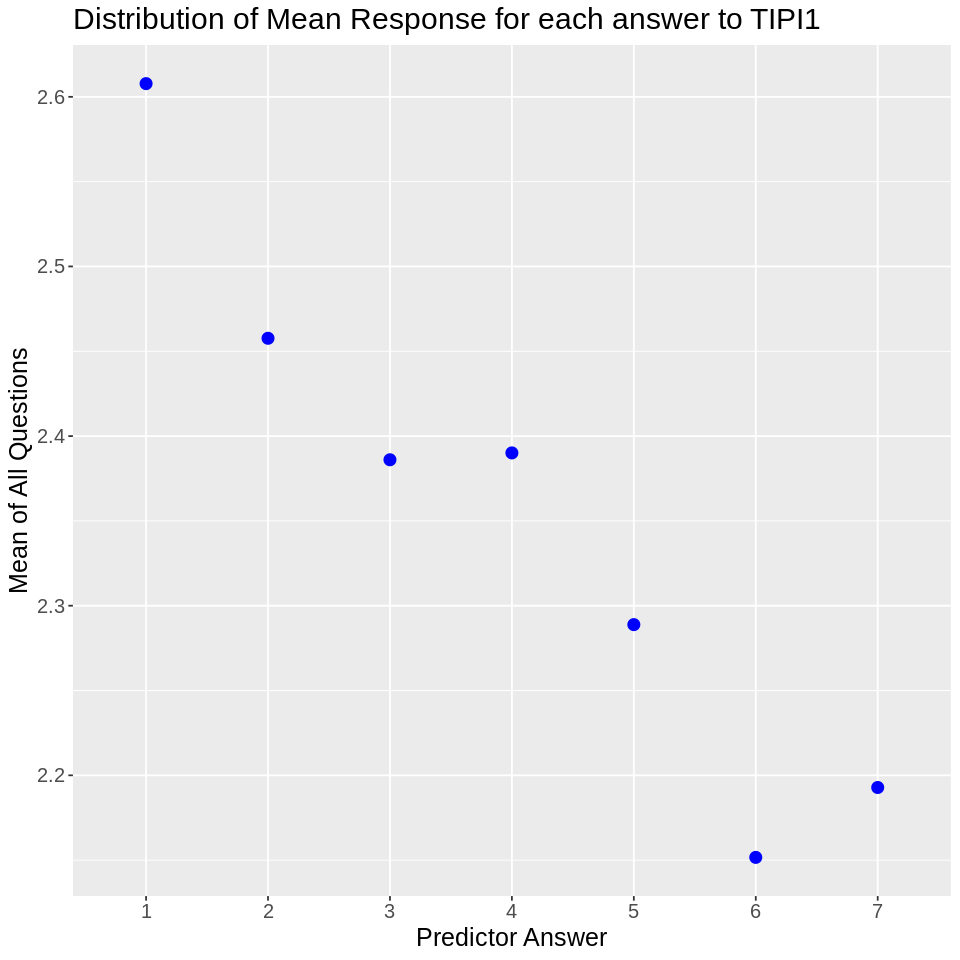

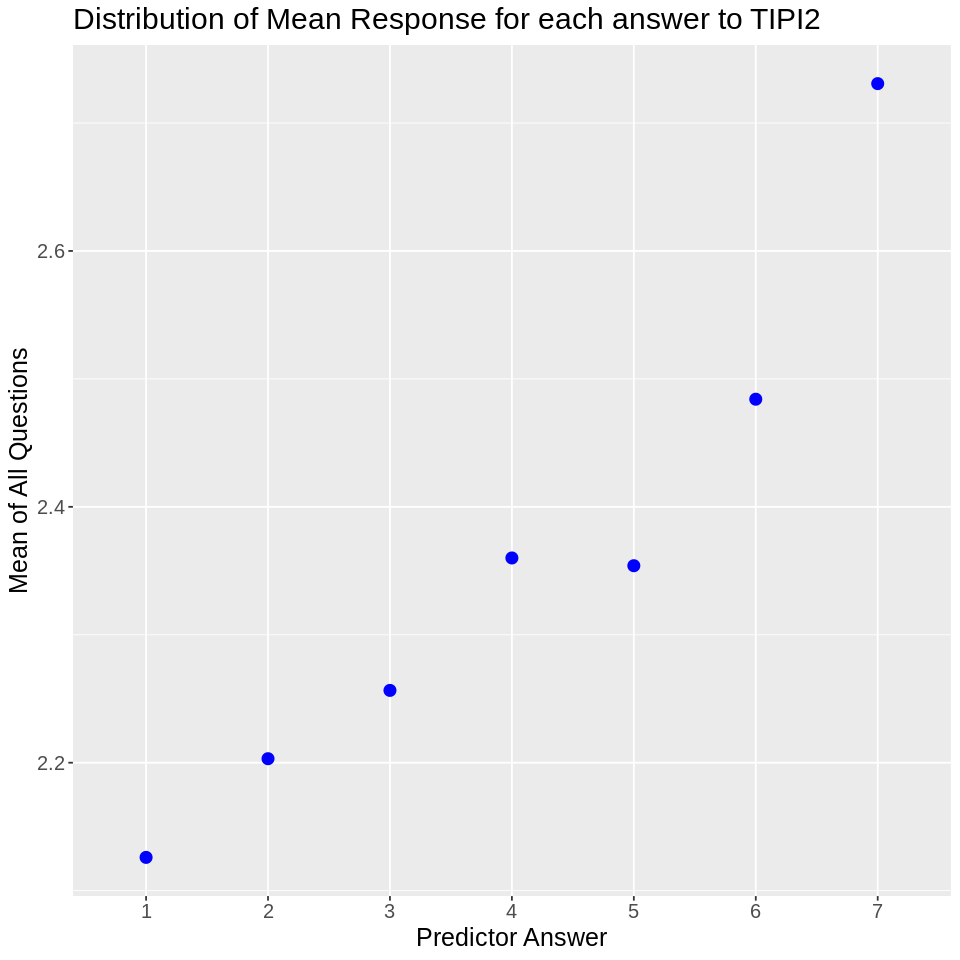

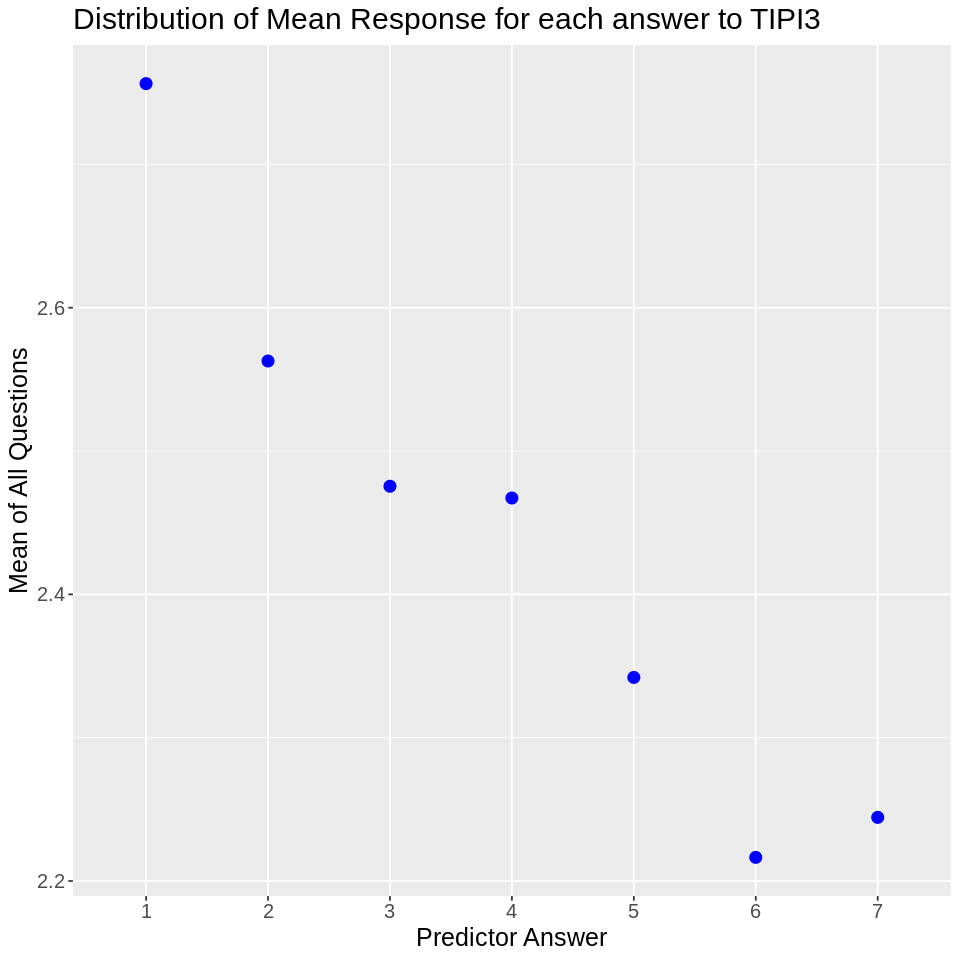

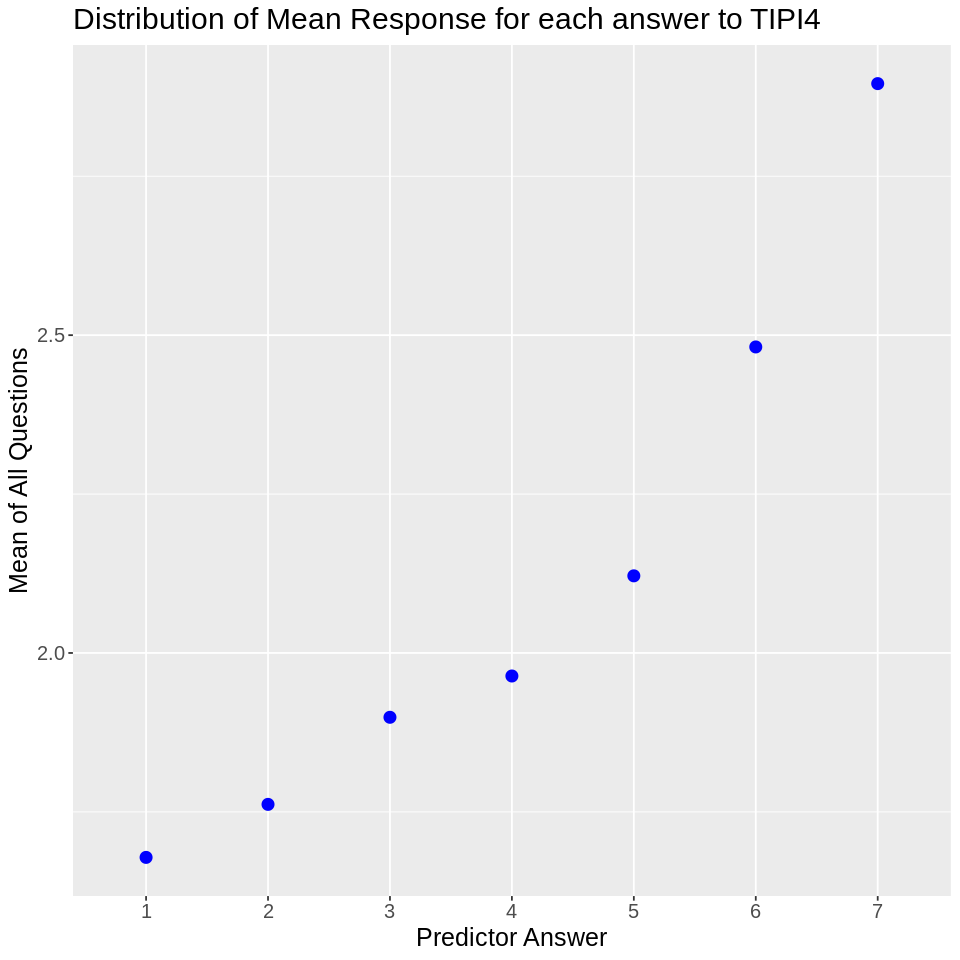

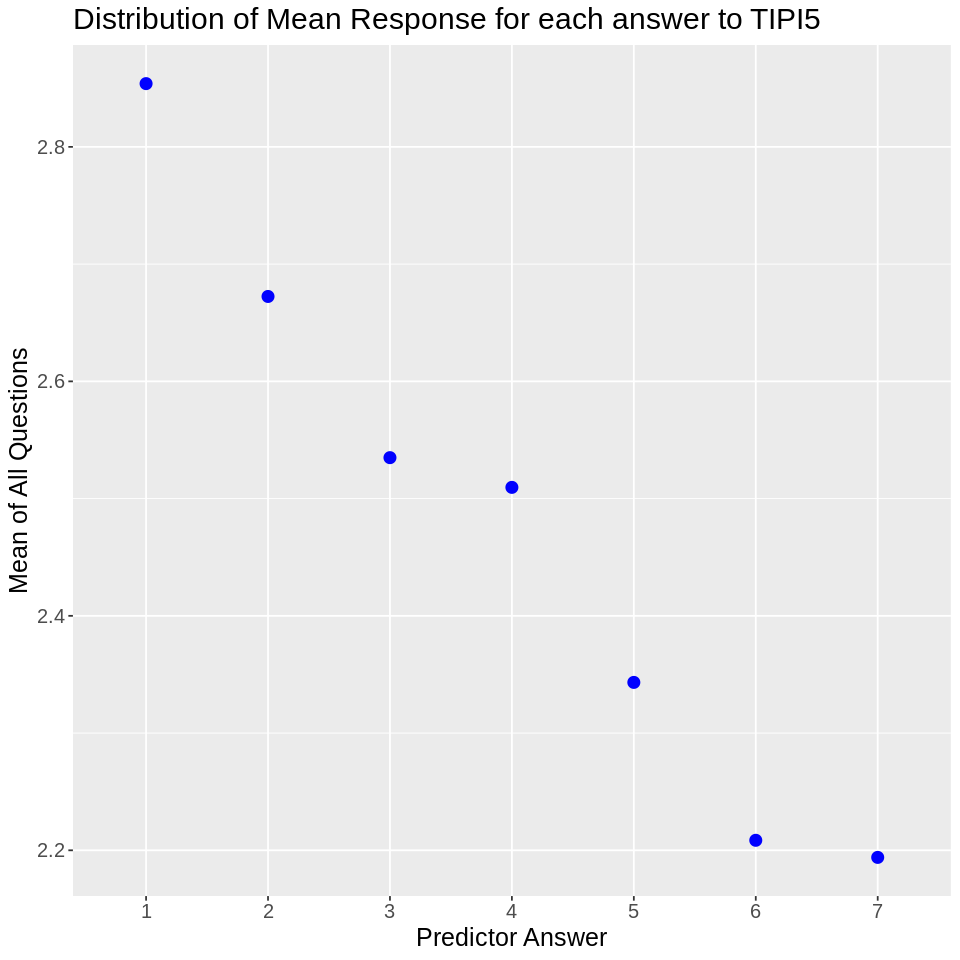

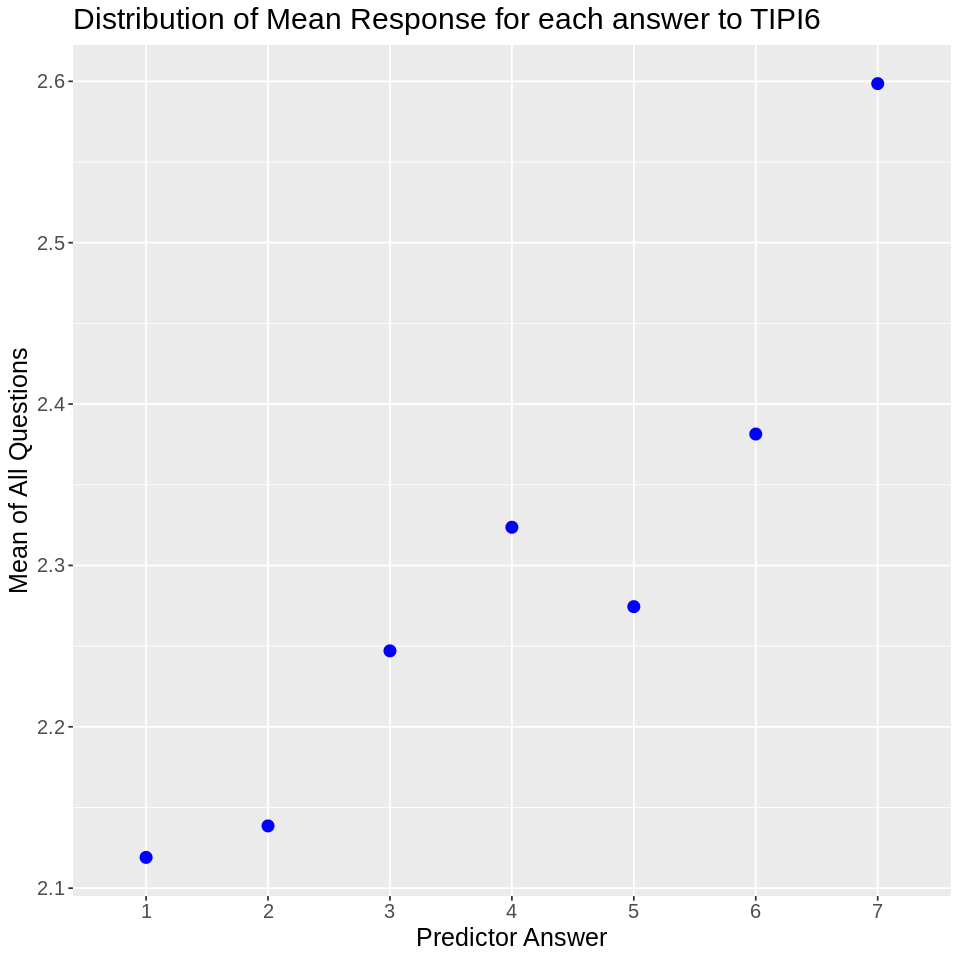

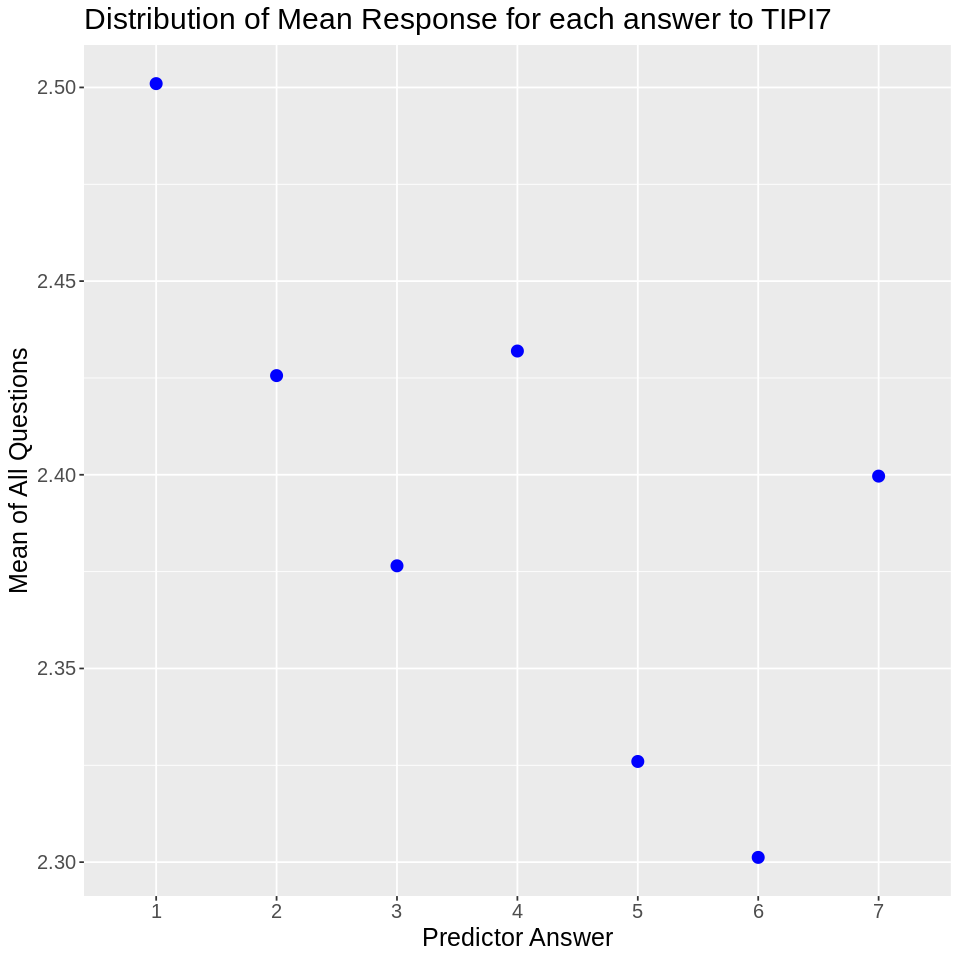

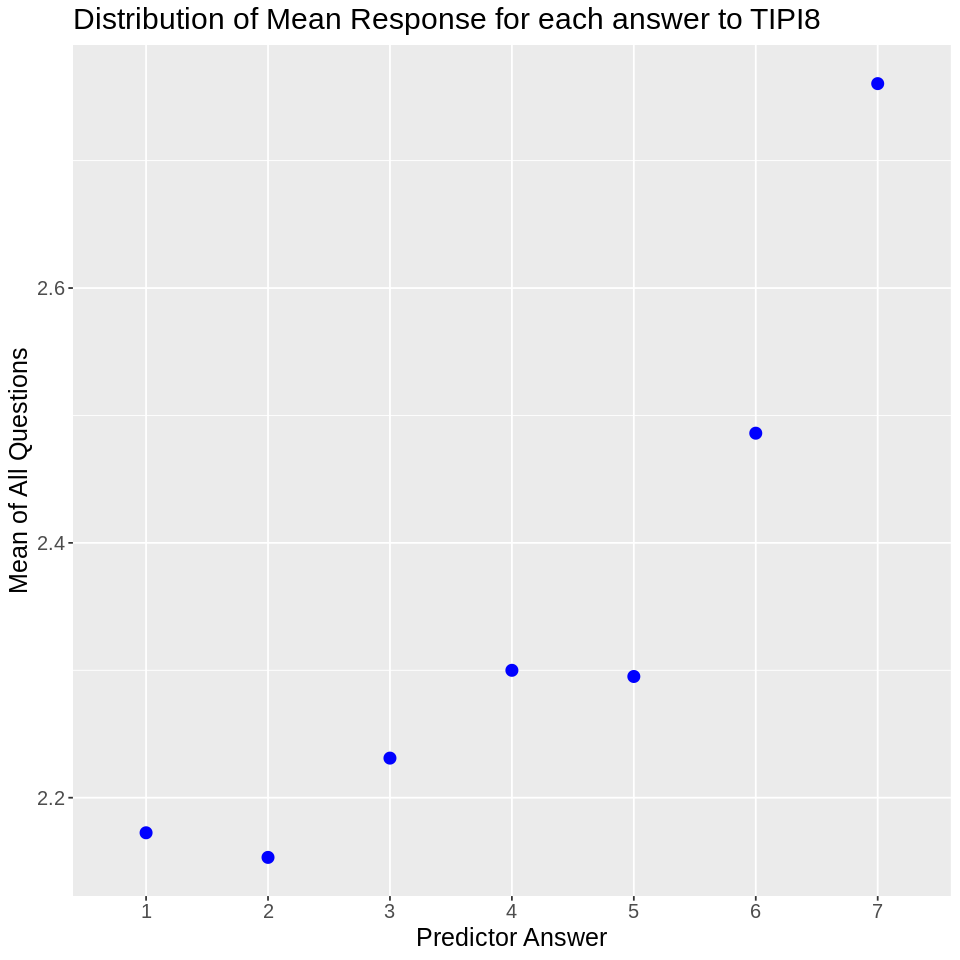

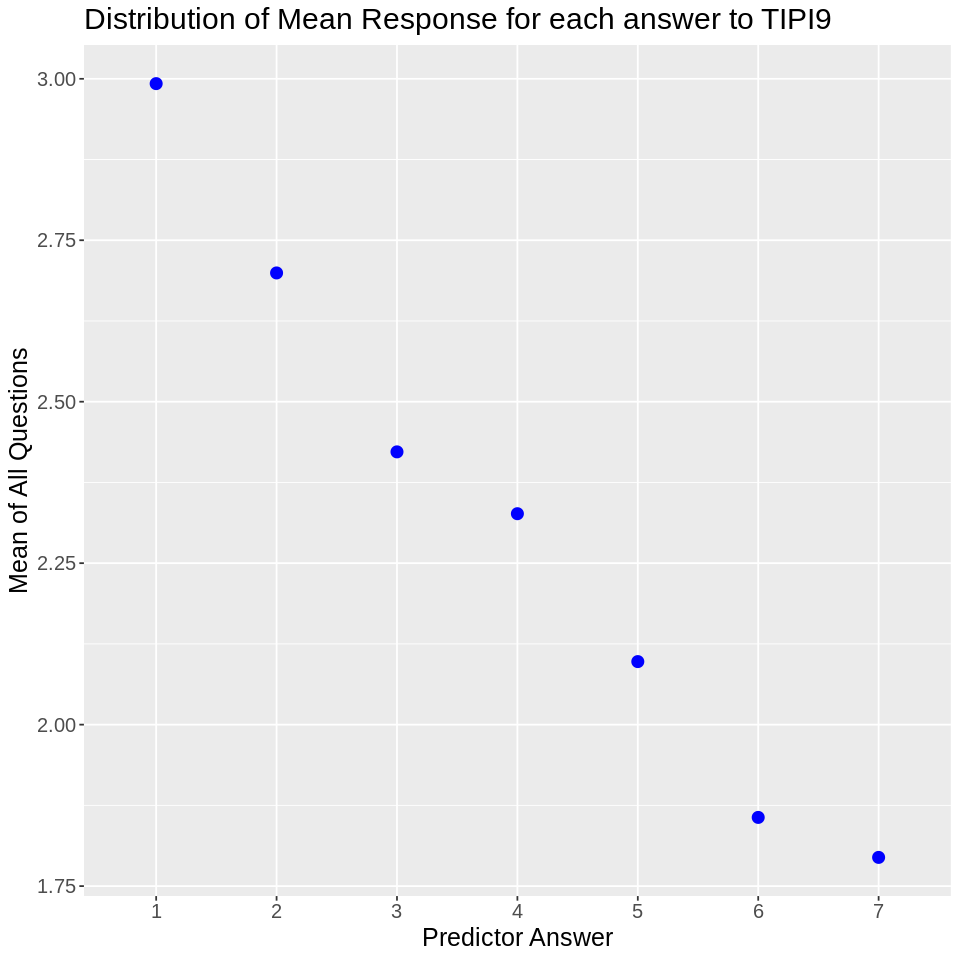

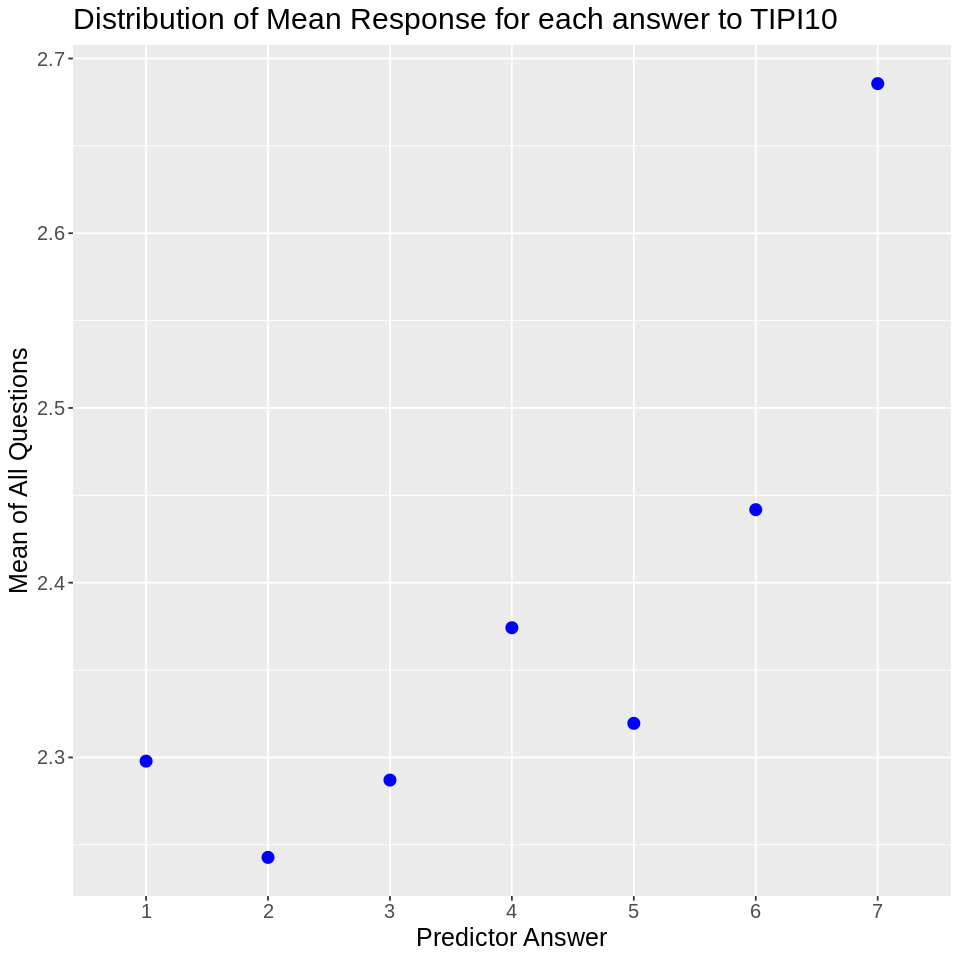

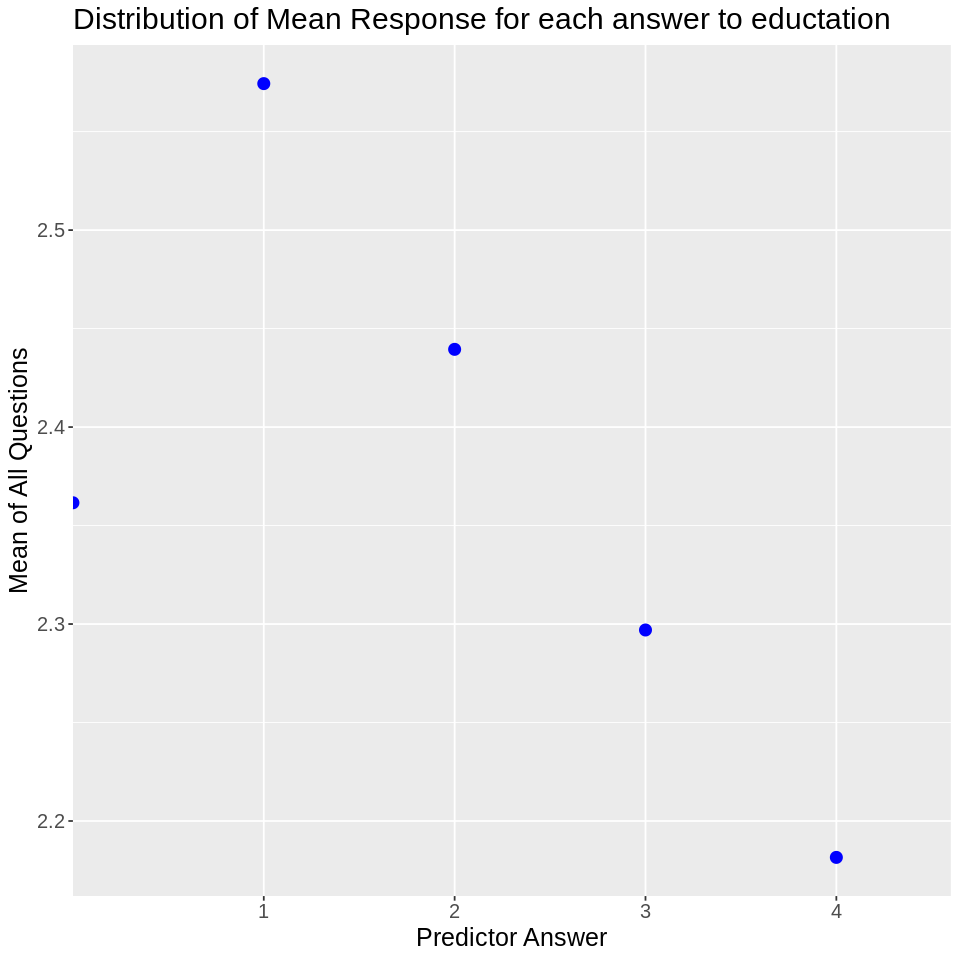

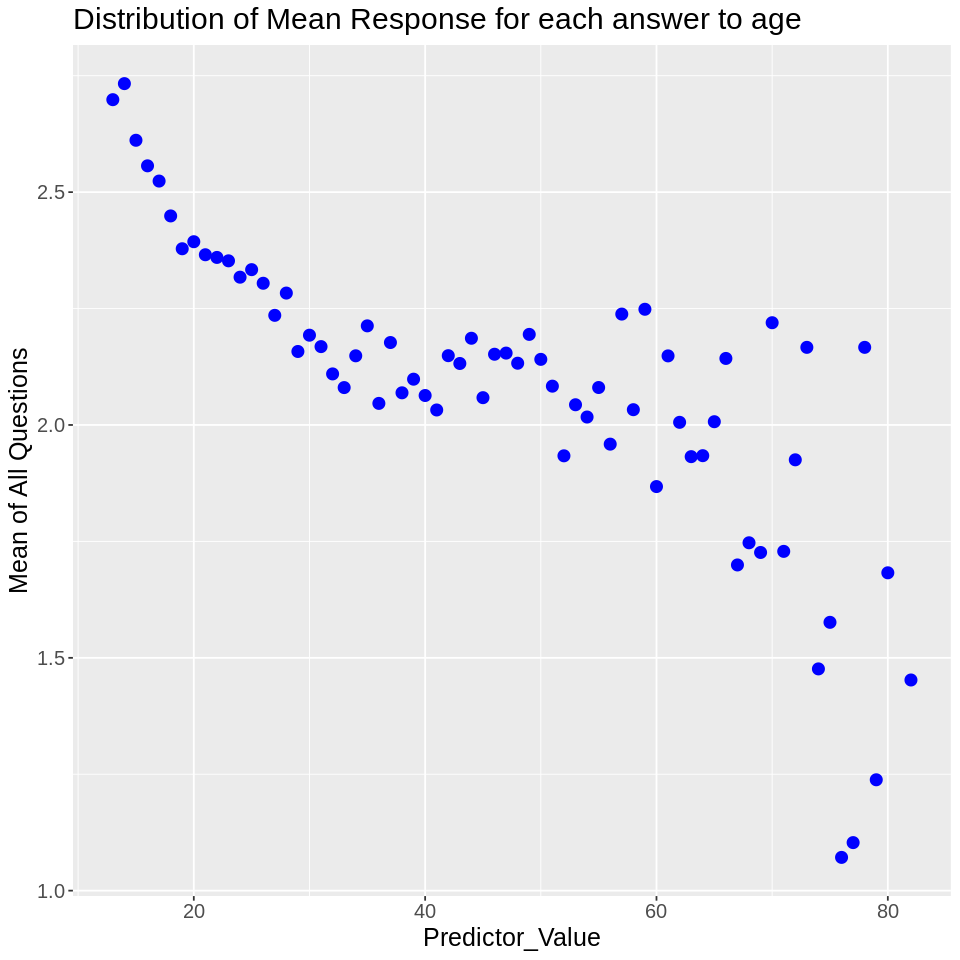

In [17]:
options(repr.plot.width=8, repr.plot.height=8)

predictor_vector <- c("TIPI1", "TIPI2", "TIPI3", "TIPI4", "TIPI5", "TIPI6", "TIPI7", "TIPI8", "TIPI9", "TIPI10")

for (c in predictor_vector) {
    
    summary <- summary_table %>% filter(Predictor == c)
    
    predictor_dist <- ggplot(summary, aes(x = Predictor_Value, y = mean)) + 
                        geom_point(color='blue', size=3) +
                        labs(y = "Mean of All Questions") +
                        scale_x_discrete(name ="Predictor Answer", limits=c("1","2","3","4","5","6","7")) +
                        theme(text = element_text(size = 15)) +
                        ggtitle(paste("Distribution of Mean Response for each answer to", c))
    
    print(predictor_dist)
}

summary_edu <- summary_table %>% filter(Predictor == "education")

education_dist <- ggplot(summary_edu, aes(x = Predictor_Value, y = mean)) + 
                        geom_point(color='blue', size=3) +
                        labs(y = "Mean of All Questions") +
                        scale_x_discrete(name ="Predictor Answer", limits=c("1","2","3","4")) +
                        theme(text = element_text(size = 15)) +
                        ggtitle(paste("Distribution of Mean Response for each answer to eductation"))

summary_age <- summary_table %>% filter(Predictor == "age")

age_dist <- ggplot(summary_age, aes(x = Predictor_Value, y = mean)) + 
                        geom_point(color='blue', size=3) +
                        labs(y = "Mean of All Questions") +
                        theme(text = element_text(size = 15)) +
                        ggtitle(paste("Distribution of Mean Response for each answer to age"))

education_dist

age_dist

## K-nn Regression Analysis

We will first split the data into a training set and a testing set. 

In [18]:
# Splitting the Data
dass_split <- initial_split(dass_clean, prop = 0.75, strata = avg)  
dass_train <- training(dass_split)   
dass_test <- testing(dass_split)

K-nn regression will be used for analysis of our prediction model, since avgQ is a continuous variable and we do not know what the relationship will look like. We assume that the method will be sufficient for 12 predictors. The k value for number of neighbors will be tuned to find the optimal k that will give the lowest rmse. Cross validation will also be done with v = 5. To minimize computation time in determining the k value, the values will first vary between 1 and 500 increasing by 100 to find the general range. 

In [19]:
# knn regression
# Takes a VERY LONG time to run due to large data set
set.seed(1234)

dass_recipe <- recipe(avg ~ ., data = dass_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

dass_spec_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("regression")

dass_workflow <- workflow() %>%
    add_recipe(dass_recipe) %>%
    add_model(dass_spec_tune)

dass_vfold <- vfold_cv(dass_train, v = 5, strata = avg)

gridvals <- tibble(neighbors = seq(from = 1, to = 500, by = 100))

dass_results <- dass_workflow %>% tune_grid(resamples = dass_vfold, grid = gridvals) %>%
                    collect_metrics()



In [20]:
dass_min <- dass_results %>%
   filter(.metric == "rmse") %>%
   arrange(mean, std_err) %>% 
   slice(1)
dass_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
101,rmse,standard,0.5223657,5,0.002635765,Model2


In [21]:
dass_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,0.7215862,5,0.002705290,Model1
1,rsq,standard,0.2054233,5,0.002285492,Model1
101,rmse,standard,0.5223657,5,0.002635765,Model2
101,rsq,standard,0.4487776,5,0.005607785,Model2
201,rmse,standard,0.5260972,5,0.002622580,Model3
201,rsq,standard,0.4471428,5,0.005699564,Model3
301,rmse,standard,0.5290126,5,0.002496660,Model4
301,rsq,standard,0.4457129,5,0.005448245,Model4
401,rmse,standard,0.5313698,5,0.002462545,Model5


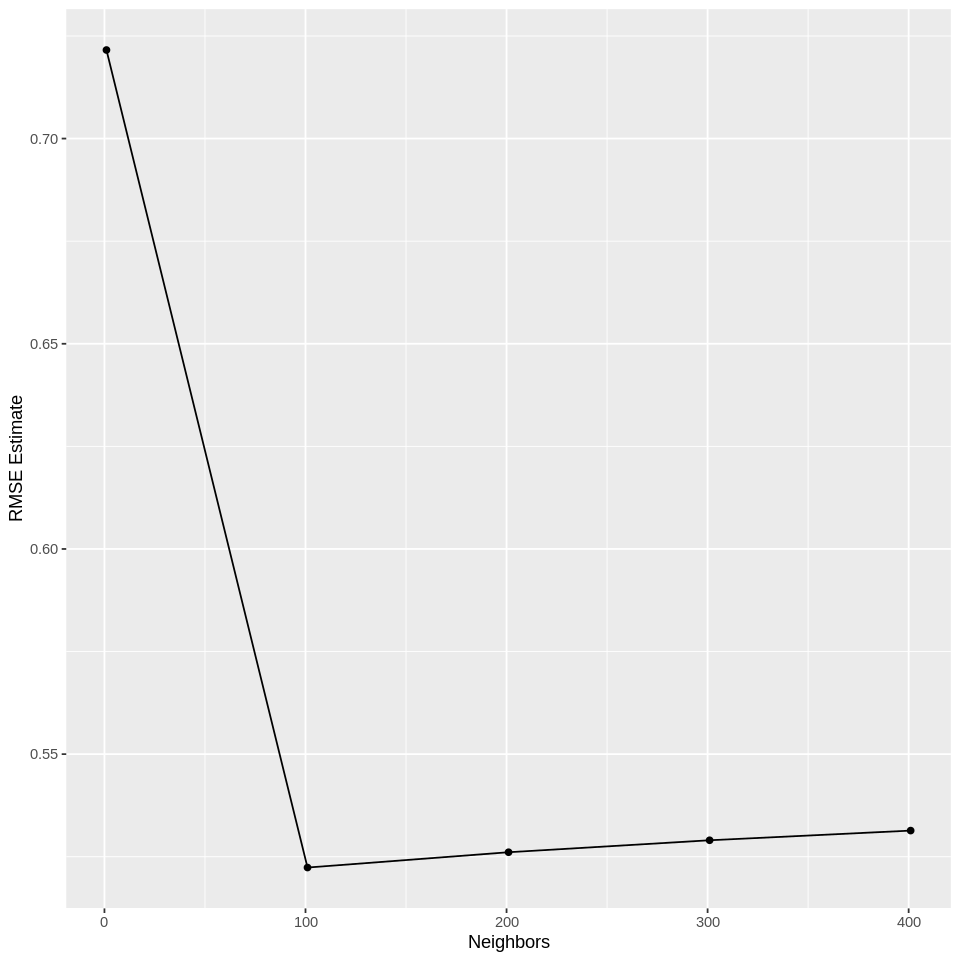

In [22]:
rmse_tune <- dass_results %>% 
      filter(.metric == "rmse")

rmse_versus_k <- ggplot(rmse_tune, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "RMSE Estimate") #+
#       scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
#       scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis
rmse_versus_k

Seeing that the optimal k value occurs around k = 101, we can now fine tune the values by trying k values from 1 to 200 increasing by 10. 

In [76]:
#Further turning of the knn model
gridvals_200 <- tibble(neighbors = seq(from = 1, to = 200, by = 10))

dass_results_200 <- dass_workflow %>% tune_grid(resamples = dass_vfold, grid = gridvals_200) %>%
                    collect_metrics()

In [77]:
dass_min_final <- dass_results_200 %>%
   filter(.metric == "rmse") %>%
   arrange(mean, std_err) %>% 
   slice(1)
dass_min_final
# lets choose neighbors = 31

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
31,rmse,standard,0.5191559,5,0.001380133,Model04


Through this method, we find the minimum rmse to be at k = 31. We can see the elbow in the plot below to validate. 

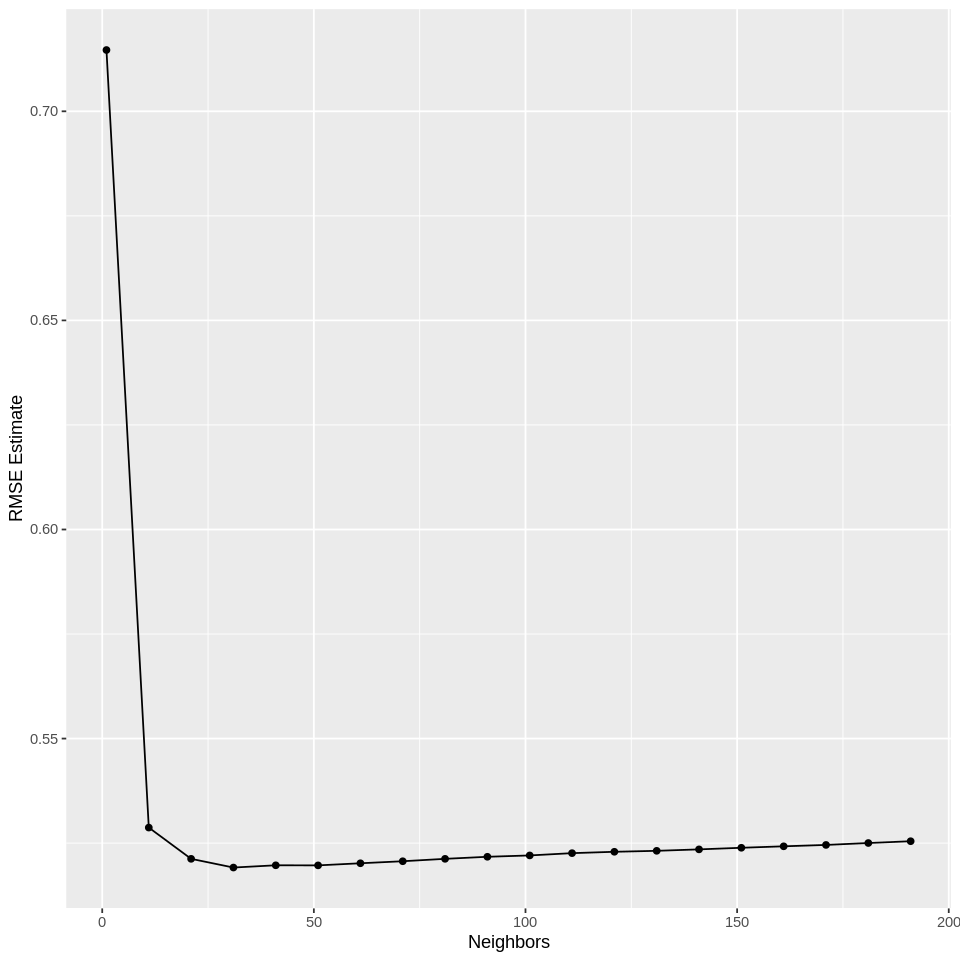

In [75]:
rmse_tune_final <- dass_results_200 %>% 
      filter(.metric == "rmse")

rmse_versus_k_final <- ggplot(rmse_tune_final, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "RMSE Estimate") #+
#       scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
#       scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis
rmse_versus_k_final

In [78]:
# Final Knn Model
set.seed(1234)

k_min <- dass_min_final %>%
         pull("neighbors") %>% as.integer()

dass_final_knn <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) %>%
         set_engine("kknn") %>%
         set_mode("regression")

dass_best_knn_fit <- workflow() %>%
         add_recipe(dass_recipe) %>%
         add_model(dass_final_knn) %>%
         fit(data = dass_train)

dass_summary <- dass_best_knn_fit %>%
          predict(dass_test) %>%
          bind_cols(dass_test) %>%
          metrics(truth = avg, estimate = .pred)

# your code here
dass_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.5233921
rsq,standard,0.4393744
mae,standard,0.4211696


Using the optimal k value of 31, the minimum rmse is found to be 0.523 which is a reasonable expectation. **may need more explanation either here or in discussion, describe what this means for data**

## Linear Regression Analysis

To contrast the K-nn regression and determine which model better fits our dataset, we will also run a linear regression model on the data to assess the linearity of the model. 

In [79]:
# linear regression
lm_spec <- linear_reg() %>%
            set_engine("lm") %>%
            set_mode("regression")

lm_recipe <- recipe(avg ~ ., data = dass_train)

lm_fit <- workflow() %>%
  add_recipe(lm_recipe) %>%
  add_model(lm_spec) %>%
  fit(data = dass_train)

lm_test_results <- lm_fit %>%
  predict(dass_test) %>%
  bind_cols(dass_test) %>%
  metrics(truth = avg, estimate = .pred)

lm_test_results

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.5248692
rsq,standard,0.4297014
mae,standard,0.4189470


The linear regression model, as seen in the table, has an rmspe of 0.525, which is very similar to the rmse of the K-nn model with an rmse of 0.523. This suggests that the relationship is in fact linear. A table of the coefficients for the linear model is shown in the table below.

In [80]:
coeffs <- lm_fit %>%
             pull_workflow_fit() %>%
             tidy()

coeffs

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1.967193041,0.0313743050,62.700769,0.000000e+00
TIPI1,-0.017967939,0.0023628652,-7.604301,2.987579e-14
TIPI2,0.022871004,0.0022075502,10.360355,4.331074e-25
TIPI3,-0.010920499,0.0024174695,-4.517327,6.297451e-06
TIPI4,0.135311414,0.0025161610,53.776930,0.000000e+00
TIPI5,-0.023718176,0.0025301138,-9.374352,7.661492e-21
TIPI6,0.034231898,0.0022265511,15.374405,4.805466e-53
TIPI7,0.013864552,0.0026303203,5.271051,1.370174e-07
TIPI8,0.030312809,0.0021198741,14.299344,3.682834e-46


We can see the contribution of each predictor based on the magnitude of the coefficient of each variable. Plotting this as a bar chart, we see that TIPI4 and TIPI9 have the largest impact on the prediction of avgQ.

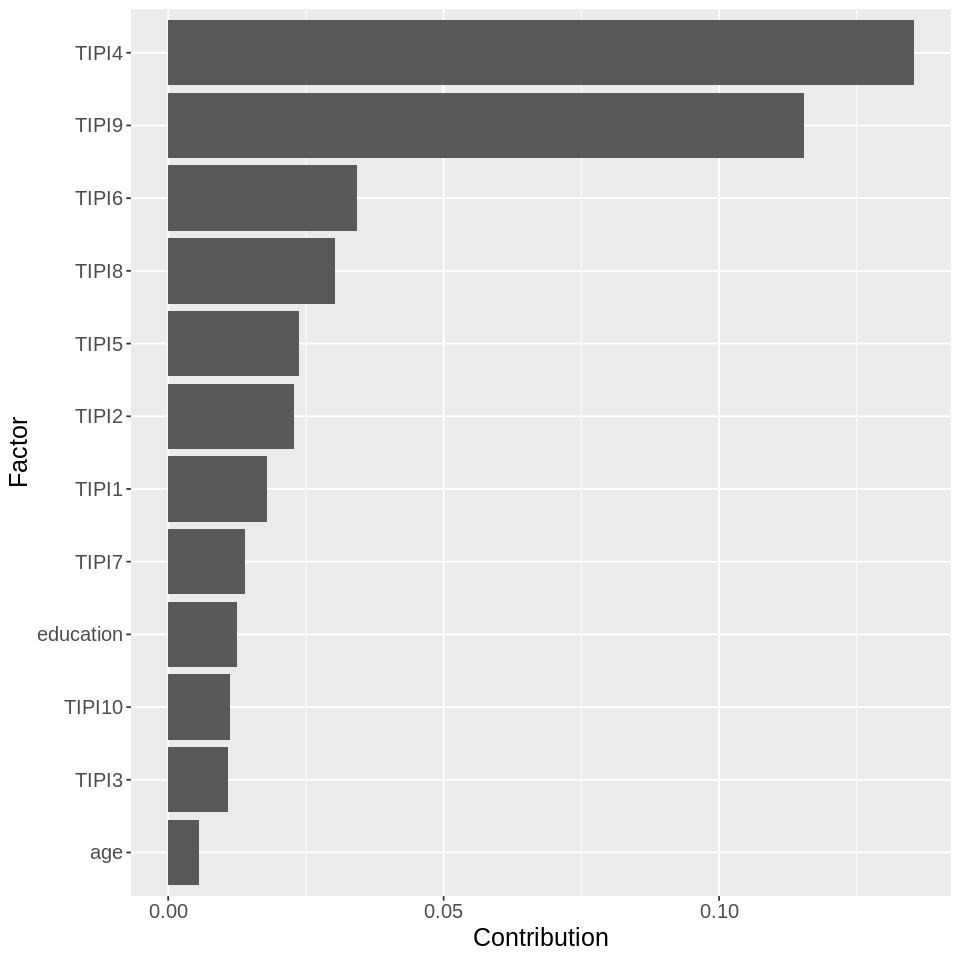

In [81]:
coeffs$abs_est = abs(coeffs$estimate)

coeffs_new = coeffs[-1,]

count_bar_chart <- ggplot(coeffs_new, aes(x = reorder(term, abs_est), y = abs_est)) + 
                    geom_bar(stat = "identity") +
                    xlab("Factor") +
                    ylab("Contribution") +
                    theme(text = element_text(size = 15))

count_bar_chart_B <- count_bar_chart + 
                        coord_flip()
count_bar_chart_B

## Discussion

Discussion text here. Discussion text here. Discussion text here. Discussion text here. Discussion text here. Discussion text here. Discussion text here. Discussion text here. Discussion text here. Discussion text here. Discussion text here. Discussion text here. Discussion text here. Discussion text here. Discussion text here. Discussion text here. Discussion text here. Discussion text here. Discussion text here. Discussion text here. Discussion text here. Discussion text here. Discussion text here. Discussion text here. Discussion text here. Discussion text here. Discussion text here. Discussion text here. Discussion text here. Discussion text here. 

## References